In [1]:
%matplotlib inline

from numpy import *
from matplotlib.pyplot import *
from math import factorial
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)

def cardinal(xdata, x):
    """
    cardinal(xdata, x): 
    In: xdata, array with the nodes x_i.
        x, array or a scalar of values in which the cardinal functions are evaluated.
    Return: l: a list of arrays of the cardinal functions evaluated in x. 
    """
    n = len(xdata)              # Number of evaluation points x
    l = []
    for i in range(n):          # Loop over the cardinal functions
        li = ones(len(x))
        for j in range(n):      # Loop to make the product for l_i
            if i is not j:
                li = li*(x-xdata[j])/(xdata[i]-xdata[j])
        l.append(li)            # Append the array to the list            
    return l

def lagrange(ydata, l):
    """
    lagrange(ydata, l):
    In: ydata, array of the y-values of the interpolation points.
         l, a list of the cardinal functions, given by cardinal(xdata, x)
    Return: An array with the interpolation polynomial. 
    """
    poly = 0                        
    for i in range(len(ydata)):
        poly = poly + ydata[i]*l[i]  
    return poly

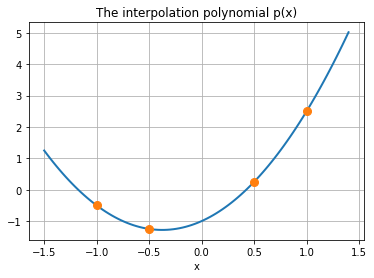

In [2]:
# Example of how to plot 
def f(x):
    return 2*pow(x,2) + 1.5*x - 1

x = linspace(-1.5,1.4,100)
x_data = [-1,-0.5,0.5,1]
y_data = [-0.5,-1.25,0.25,2.5]

plot(x,f(x))
plot(x_data,y_data,"o")
title('The interpolation polynomial p(x)')
xlabel('x');


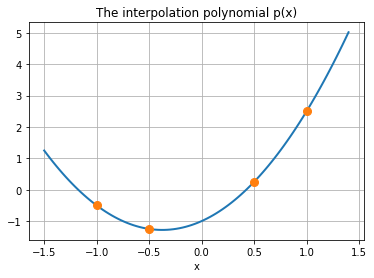

In [3]:
# Now use the cardinal and lagrange function 

l = cardinal(x_data, x)
p = lagrange(y_data, l)

plot(x, p)
plot(x_data, y_data, 'o')
title('The interpolation polynomial p(x)')
xlabel('x');

[2000. 2010. 2025. 2030.]
[ 4472371.589824    4848757.087424    3829736.29382404 -1174984.14137605]


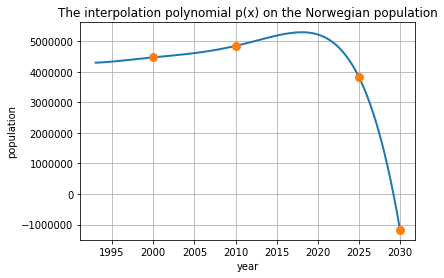

In [4]:
# New example on the Norwegian population

x = linspace(1993,2030,100)
xdata = [1993,1998,2003,2008,2013,2018]
ydata = [4299167,4417599,4552252,4737171,5051275,5295619]


l = cardinal(xdata, x)
p = lagrange(ydata, l)
plot(x, p)

find = array([2000.0,2010.0,2025.0,2030.0])
l = cardinal(xdata, find)
p = lagrange(ydata, l)
plot(find,p,"o")
print(find)
print(p)
   
title('The interpolation polynomial p(x) on the Norwegian population')
xlabel('year');
ylabel("population");

In [5]:
def chebyshev_nodes(a, b, n):
    # n Chebyshev nodes in the interval [a, b] 
    i = array(range(n))                 # i = [0,1,2,3, ....n-1]
    x = cos((2*i+1)*pi/(2*(n)))         # nodes over the interval [-1,1]
    return 0.5*(b-a)*x+0.5*(b+a)        # nodes over the interval [a,b]


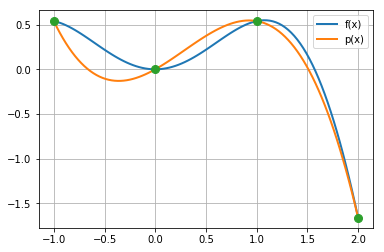

In [6]:
# New example where we compare equally distributed nodes up to chebyshev_nodes and show the difference in error

def g(x):
    return pow(x,2)*cos(x)

# Set the intervall
a,b = -1,2
x = linspace(a,b,101)

# Set the interpolation points
n = 3
xdata = linspace(a,b,n+1)
ydata = g(xdata)

# Evaluate the interpolation polynomial in the x values
l = cardinal(xdata,x)
p = lagrange(ydata,l)

# Plot f(x) and p(x) and the interpolation points
plot(x,g(x))
plot(x,p)
plot(xdata,ydata,"o")
legend(["f(x)","p(x)"]);

Max error is 0.34817000214594074


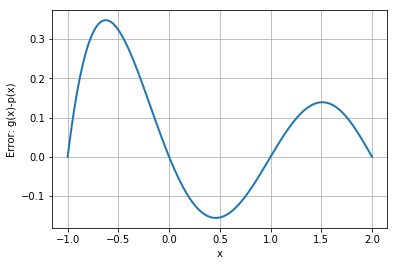

In [7]:
# Plot the interpolation error with the use of equaly distributed nodes
plot(x,(g(x)-p))
xlabel("x")
ylabel("Error: g(x)-p(x)")
print(f"Max error is {max(abs(p-g(x)))}")

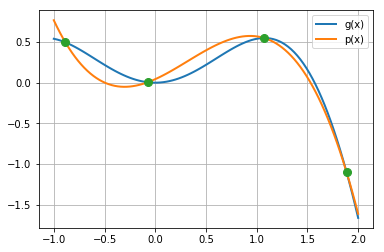

In [8]:
# Set the interpolation points, now with chebyshev nodes
n = 3
xdata = chebyshev_nodes(a,b,n+1)
ydata = g(xdata)

# Evaluate the interpolation polynomial in the x values
l = cardinal(xdata,x)
p = lagrange(ydata,l)

# Plot f(x) and p(x) and the interpolation points
plot(x,g(x))
plot(x,p)
plot(xdata,ydata,"o")
legend(["g(x)","p(x)"]);

Max error is 0.2282117011385698


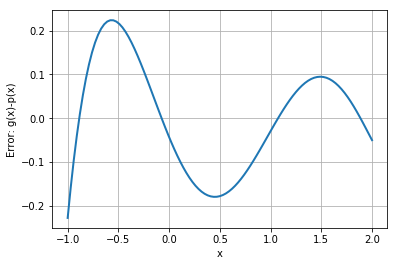

In [9]:
# Plot the interpolation error
plot(x,(g(x)-p))
xlabel("x")
ylabel("Error: g(x)-p(x)")
print(f"Max error is {max(abs(p-g(x)))}")

In [14]:
# We can really see how good chebyshev nodes are if we do it with more nodes

num_of_nodes = [5,10,15,20]
for n in num_of_nodes:
    xdata = chebyshev_nodes(a,b,n+1)
    ydata = g(xdata)
    l = cardinal(xdata,x)
    p = lagrange(ydata,l)
    print(f"Max error is {max(abs(p-g(x)))}")

Max error is 0.01183301399626413
Max error is 1.4947517934515986e-07
Max error is 1.971756091734278e-13
Max error is 1.5543122344752192e-15


Newtown Interpolation

In [11]:
def divdiff(xdata,ydata):
    # Create the table of divided differences based
    # on the data in the arrays x_data and y_data. 
    n = len(xdata)
    F = zeros((n,n))
    F[:,0] = ydata             # Array for the divided differences
    for j in range(n):
        for i in range(n-j-1):
            F[i,j+1] = (F[i+1,j]-F[i,j])/(xdata[i+j+1]-xdata[i])
    return F                    # Return all of F for inspection. 
                                # Only the first row is necessary for the
                                # polynomial.

def newton_interpolation(F, xdata, x):
    # The Newton interpolation polynomial evaluated in x. 
    n, m = shape(F)
    xpoly = ones(len(x))               # (x-x[0])(x-x[1])...
    newton_poly = F[0,0]*ones(len(x))  # The Newton polynomial
    for j in range(n-1):
        xpoly = xpoly*(x-xdata[j])
        newton_poly = newton_poly + F[0,j+1]*xpoly
    return newton_poly

Max error is 8.881784197001252e-16
Max error is 8.881784197001252e-16
Max error is 1.7763568394002505e-15
Max error is 8.881784197001252e-16


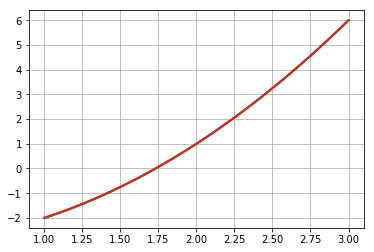

In [29]:
# Correct function
def h(x):
    return pow(x,2)-3

# Set the intervall
a,b = 1,3
x = linspace(a,b,101)

n = 2
while n <= 16:
    xdata = linspace(a,b,n+1)
    ydata = h(xdata)
    F = divdiff(xdata, ydata)      # The table of divided differences
    p = newton_interpolation(F, xdata, x)
    plot(x, p)                  # Plot the polynomial
    print(f"Max error is {max(abs(p-h(x)))}")
    n *= 2

